# Stack Overflow EDA
##### _Yuqin Wei_ 
##### _2018/11/28_
The original input file is the SQL Server Database of all Stack Overflow questions created in 2010 or earlier. The csv input file was generated with the following T-SQL Code. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [22]:
input_path = "/Volumes/SharedData/StackOverflow/Export/"
df = pd.read_csv(input_path + "Questions_num.csv", encoding = 'utf-16', error_bad_lines=False)

In [23]:
df['LastActivityDateTime'] = pd.to_datetime(df.LastActivityDate)
df = df.set_index('LastActivityDateTime')

In [24]:
df.head(10)

,Id,AcceptedAnswerId,AnswerCount,CommentCount,FavoriteCount,LastActivityDate,Score,Tags,ViewCount
LastActivityDateTime,,,,,,,,,
2009-07-17 11:27:44.287,9228,9233,4,0,0,2009-07-17 11:27:44.287000000,3,<sql-server><performance><ado.net>,1987
2013-11-24 07:53:34.813,9231,9260,9,0,0,2013-11-24 07:53:34.813000000,8,<backup><offsite>,580
2014-03-08 23:39:32.960,9240,9502,9,0,3,2014-03-08 23:39:32.960000000,11,<architecture>,2593
2015-03-15 19:51:31.420,9256,16362,2,0,1,2015-03-15 19:51:31.420000000,5,<flex><actionscript-3><firefox>,1381
2018-05-02 19:40:16.820,9272,971143,15,3,25,2018-05-02 19:40:16.820000000,83,<version-control><perforce>,33595
2015-12-22 07:15:20.500,9275,9325,4,0,0,2015-12-22 07:15:20.500000000,1,<sql-server><visual-studio><sql-server-2008><r...,9740
2018-05-10 00:16:29.687,9279,9287,15,1,17,2018-05-10 00:16:29.687000000,36,<linux><macos><ssh><sftp>,28874
2018-05-01 19:53:14.560,9289,9297,6,1,7,2018-05-01 19:53:14.560000000,56,<javascript><functional-programming><data-mani...,47123
2018-01-14 19:55:53.817,9301,0,6,1,0,2018-01-14 19:55:53.817000000,5,<javascript><internet-explorer><events><intern...,1048


Take a look at the distribution of those 'counts' variables and their association with 'Score'

In [25]:
df.AnswerCount.value_counts().head(10)

1    342437
2    285094
3    179989
4    106285
5     62409
6     37433
7     22824
8     14803
9      9692
0      7784
Name: AnswerCount, dtype: int64

In [26]:
sum(df.AnswerCount >= 1)/df.shape[0]

0.9928987432308164

99% Questions were answered. This is too high because this is for questions in 2010.

In [27]:
df.CommentCount.value_counts().head(10)

0    638726
1    173131
2    127140
3     63235
4     37350
5     21017
6     13289
7      7730
8      4884
9      3041
Name: CommentCount, dtype: int64

(array([8.11857e+05, 1.90375e+05, 5.83670e+04, 2.10190e+04, 7.92500e+03,
        3.38400e+03, 1.51700e+03, 7.08000e+02, 3.95000e+02, 2.28000e+02,
        1.48000e+02, 7.00000e+01, 4.80000e+01, 3.40000e+01, 2.10000e+01,
        1.40000e+01, 5.00000e+00, 8.00000e+00, 6.00000e+00, 4.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60.]),
 <a list of 30 Patch objects>)

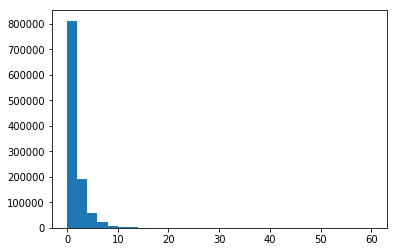

In [28]:
plt.hist(df.CommentCount, bins=30)

In [29]:
df.FavoriteCount.value_counts().head(10)

0    634928
1    199140
2     83040
3     44078
4     26533
5     17648
6     12739
7      9794
8      7469
9      6110
Name: FavoriteCount, dtype: int64

(array([1.095287e+06, 5.600000e+02, 1.670000e+02, 5.000000e+01,
        2.800000e+01, 1.100000e+01, 1.100000e+01, 4.000000e+00,
        4.000000e+00, 1.000000e+00, 3.000000e+00, 2.000000e+00,
        1.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00,
        1.000000e+00, 3.000000e+00, 0.000000e+00, 3.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([   0.        ,  302.86666667,  605.73333333,  908.6       ,
        1211.46666667, 1514.33333333, 1817.2       , 2120.06666667,
        2422.93333333, 2725.8       , 3028.66666667, 3331.53333333,
        3634.4       , 3937.26666667, 4240.13333333, 4543.        ,
        4845.86666667, 5148.73333333, 5451.6       , 5754.46666667,
        6057.33333333, 6360.2       , 6663.06666667, 6965.93333333,
        7268.8       , 7571.66666667, 7874.53333333, 8177.4       ,
        8480.26666667, 8783.13333333, 

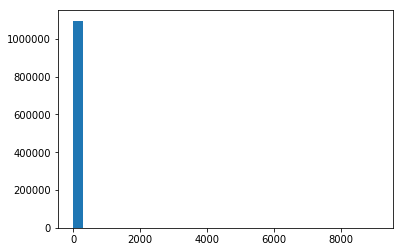

In [30]:
plt.hist(df.FavoriteCount, bins=30)

In [31]:
df.ViewCount.describe()

count    1.096144e+06
mean     8.777164e+03
std      4.760047e+04
min      8.000000e+00
25%      4.710000e+02
50%      1.376000e+03
75%      4.282000e+03
max      6.842435e+06
Name: ViewCount, dtype: float64

In [32]:
df.Score.describe()

count    1.096144e+06
mean     8.760901e+00
std      6.762170e+01
min     -1.460000e+02
25%      0.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.797000e+04
Name: Score, dtype: float64

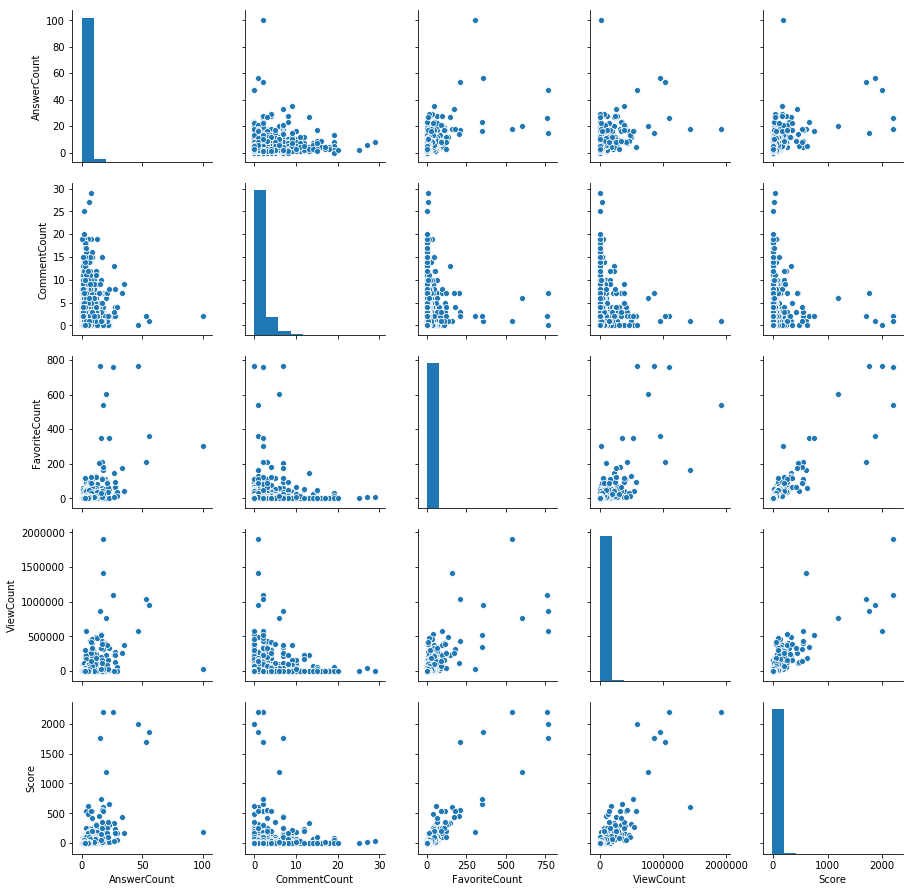

In [33]:
sns.pairplot(df[['AnswerCount', 'CommentCount', 'FavoriteCount', 'ViewCount', 'Score']].sample(n=10000))

It seems that FavoriteCount has strong positive association with score. AnswerCount and ViewCount have the same trend but less obvious. There are a lot questions with high CommentCount but not a high score.

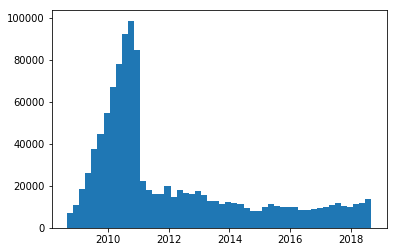

In [41]:
plt.hist(df.index, bins = 50)
plt.show()

Change LastActivityDate to CreateDate for next run. 

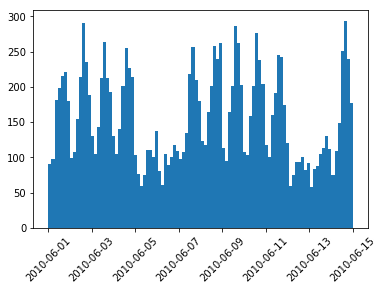

In [50]:
plt.hist(df["2010-6-1":"2010-6-14"].index, bins=100)
plt.xticks(rotation=45)
plt.show()

There exists weekly seasonality. More posts on weekdays and much fewer on weekends.

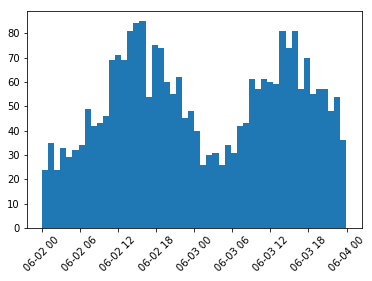

In [54]:
plt.hist(df["2010-6-2":"2010-6-3"].index, bins=50)
plt.xticks(rotation=45)
plt.show()

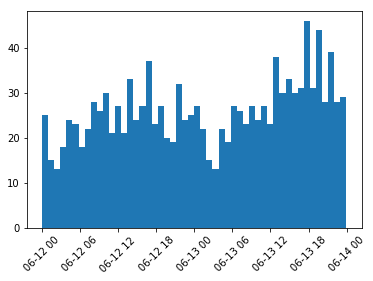

In [53]:
plt.hist(df["2010-6-12":"2010-6-13"].index, bins=50)
plt.xticks(rotation=45)
plt.show()

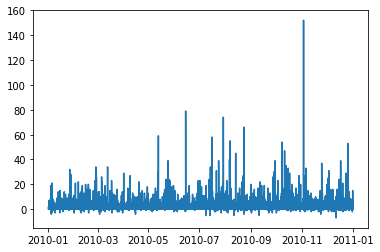

In [35]:
plt.plot(df["2010-1-1":"2010-12-31"][['Score']].sample(n=10000).sort_index())

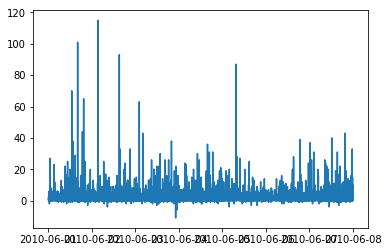

In [36]:
plt.plot(df["2010-6-1":"2010-6-7"][['Score']].sort_index())

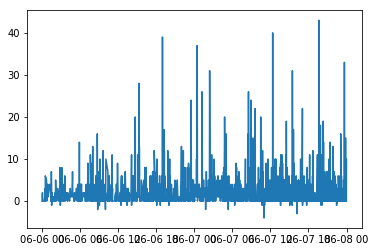

In [37]:
plt.plot(df["2010-6-6":"2010-6-7"][['Score']].sort_index())